In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from scipy.stats import norm, boxcox
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
sns.set()

In [60]:
df=pd.read_csv('winequality-red.csv')

In [61]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Checking the shape of the dataset

In [62]:
df.shape

(1599, 12)

There are 1599 rows and 12 columns

checking null values

In [63]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [64]:
# checking NA
df.isna().sum()

# No null and no NA values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [65]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [66]:
#unique values
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

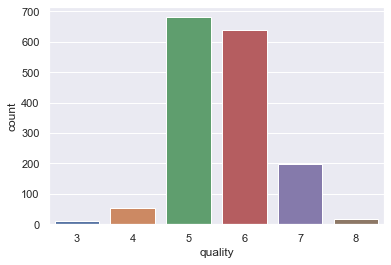

In [67]:
sns.countplot(x ='quality', data = df)

In [68]:
from collections import Counter
Counter(df['quality'])

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

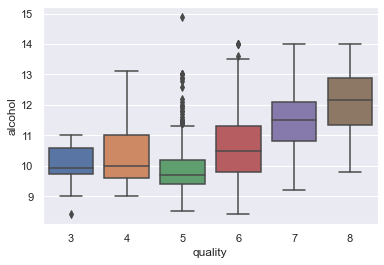

In [69]:
sns.boxplot(x="quality",y="alcohol", data=df)

we can see that as alcohol is increasing the quality of wine is improving

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

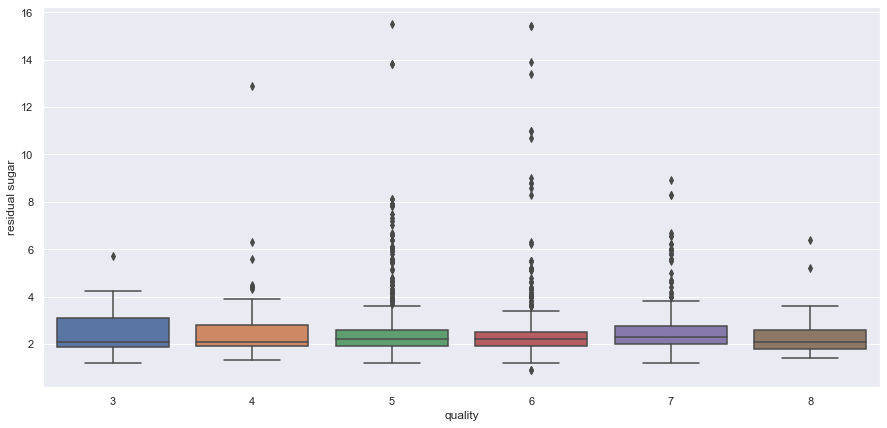

In [70]:
plot = plt.figure(figsize=(15,7))
sns.boxplot(x="quality",y="residual sugar", data=df)

We can see that there is no correlation between the residual sugar and quality.

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

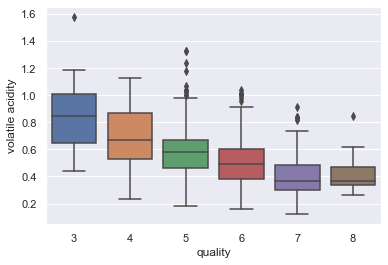

In [71]:
sns.boxplot(x="quality",y="volatile acidity", data=df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

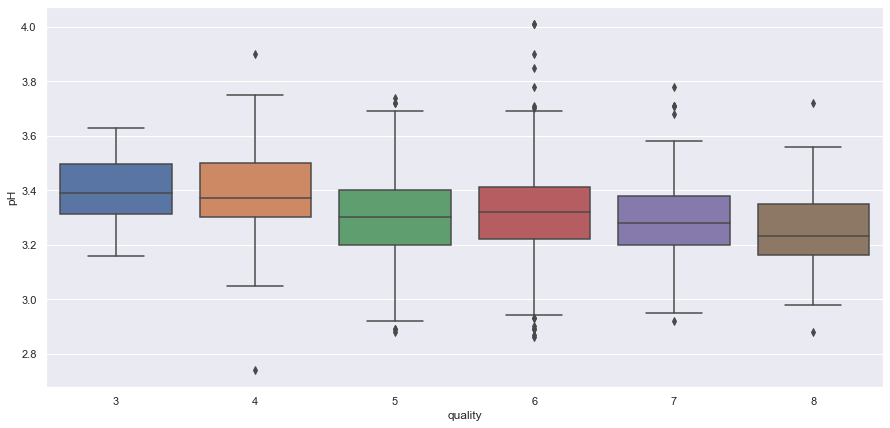

In [72]:
plot = plt.figure(figsize=(15,7))
sns.boxplot(x="quality",y="pH", data=df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

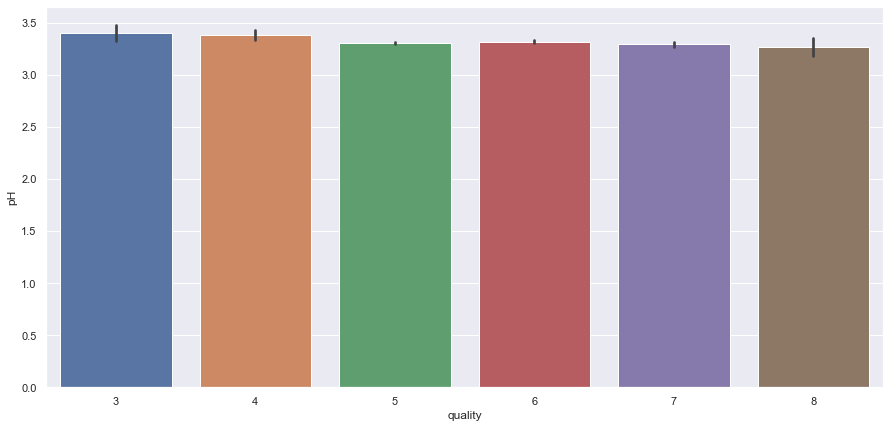

In [73]:
plot = plt.figure(figsize=(15,7))
sns.barplot(x="quality",y="pH", data=df)

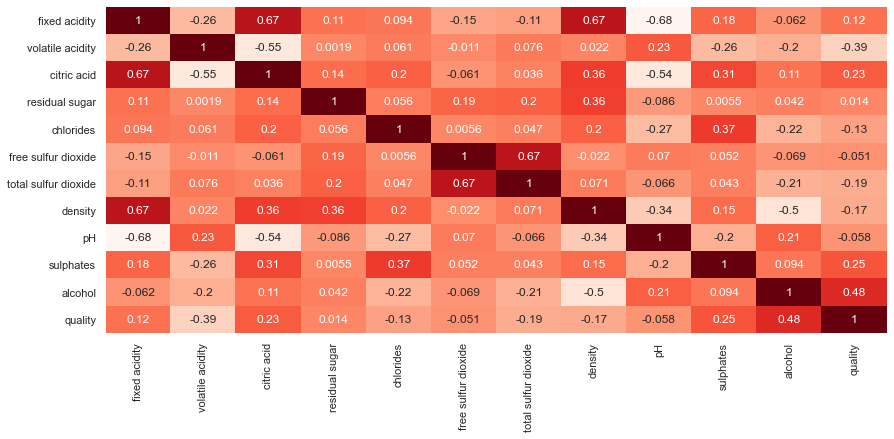

In [74]:
#Pearson Correlation
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(method='pearson'), annot=True, cbar=False, cmap='Reds')
plt.show()

In [75]:
#Removing Outliers

features = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar',
                      'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density','pH','sulphates','alcohol']

Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[features] < (Q1 - 1.5 * IQR)) |(df[features] > (Q3 + 1.5 * IQR))).any(axis=1)]


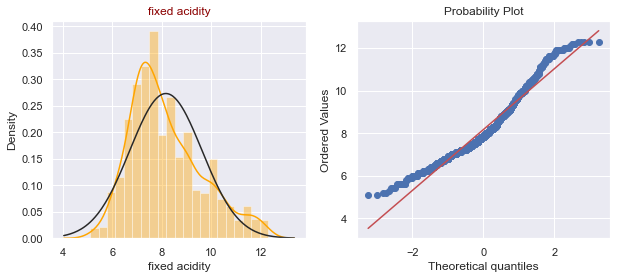

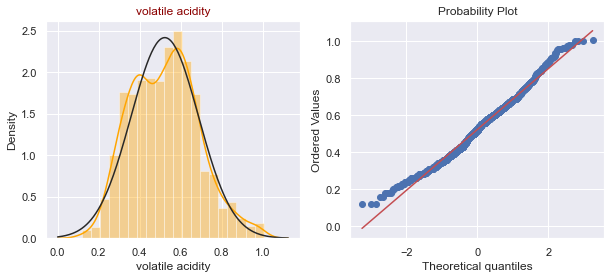

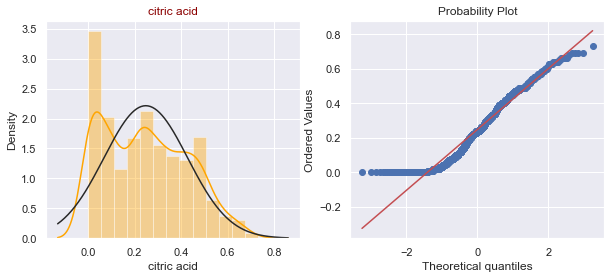

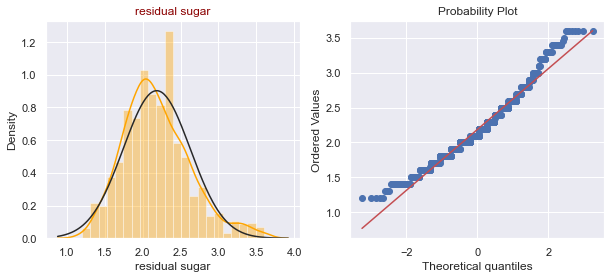

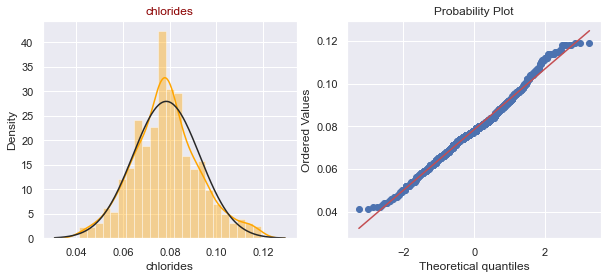

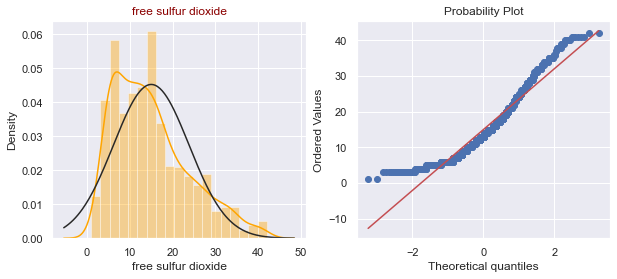

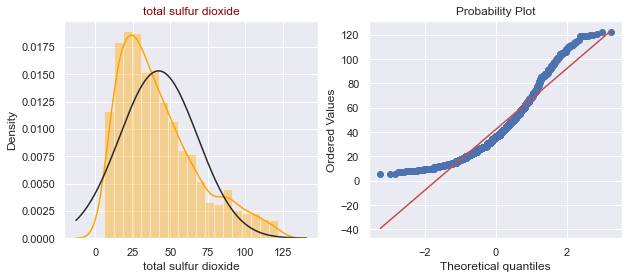

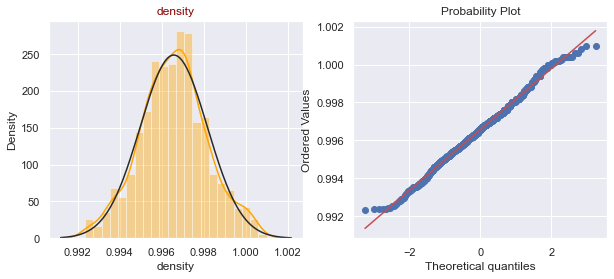

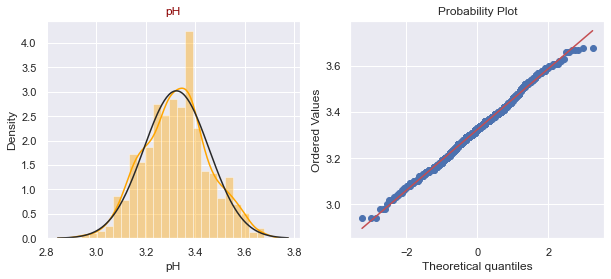

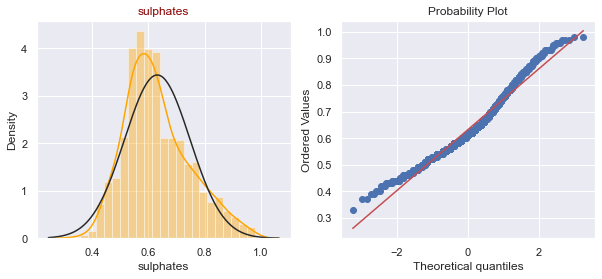

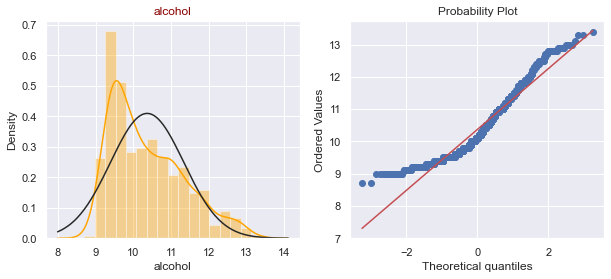

In [76]:
for i in features:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.distplot(df[i], fit=norm, color="orange")
    plt.title(i, color = "darkred")
    plt.subplot(1,2,2)
    stats.probplot(df[i], plot = plt)
    plt.show()

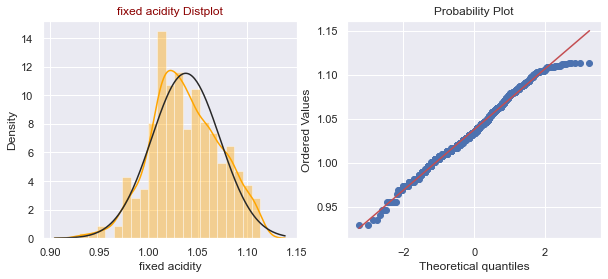

In [77]:
df["fixed acidity"], lam = boxcox(df["fixed acidity"])
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["fixed acidity"], fit=norm, color="orange")
plt.title("fixed acidity Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["fixed acidity"], plot = plt)
plt.show()

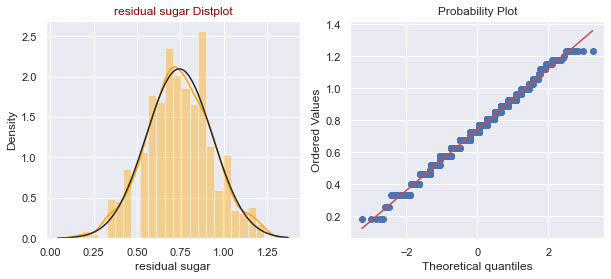

In [78]:
df["residual sugar"], lam_fixed_acidity = boxcox(df["residual sugar"])
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["residual sugar"], fit=norm, color="orange")
plt.title("residual sugar Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["residual sugar"], plot = plt)
plt.show()

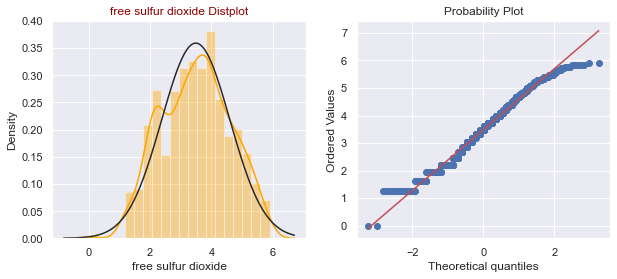

In [79]:
df["free sulfur dioxide"], lam_fixed_acidity = boxcox(df["free sulfur dioxide"])
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["free sulfur dioxide"], fit=norm, color="orange")
plt.title("free sulfur dioxide Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["free sulfur dioxide"], plot = plt)
plt.show()

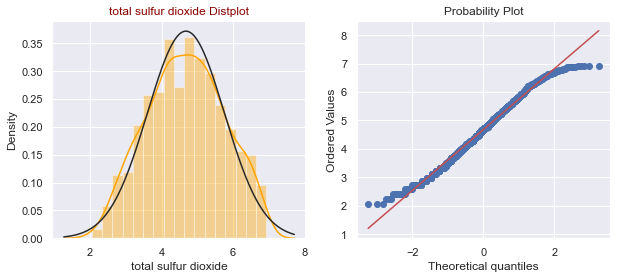

In [80]:
df["total sulfur dioxide"], lam_fixed_acidity = boxcox(df["total sulfur dioxide"])
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["total sulfur dioxide"], fit=norm, color="orange")
plt.title("total sulfur dioxide Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["total sulfur dioxide"], plot = plt)
plt.show()

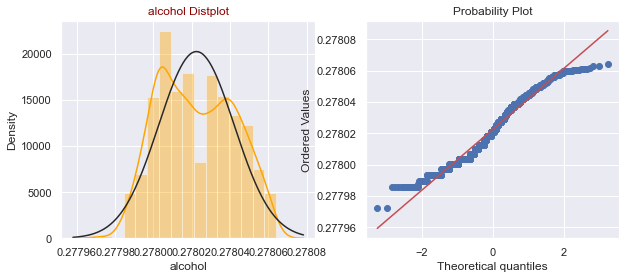

In [81]:
df["alcohol"], lam_fixed_acidity = boxcox(df["alcohol"])
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["alcohol"], fit=norm, color="orange")
plt.title("alcohol Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["alcohol"], plot = plt)
plt.show()

In [82]:
# dividing the target variable (quality) into 3 class.
# class1: bad (qulaity 3,4), Class2: Avergae (qulaity 5,6,7), Class3: Good (qulaity 8)
reviews = []
for i in df['quality']:
    if i >= 3 and i <= 4:
        reviews.append('1')
    elif i >= 5 and i <= 7:
        reviews.append('2')
    elif i == 8:
        reviews.append('3')
df['Reviews'] = reviews

In [83]:
Counter(df['Reviews'])

Counter({'2': 1146, '1': 36, '3': 12})

In [84]:
X=df.drop('quality',axis=1)

In [85]:
df.groupby('Reviews').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Reviews,,,,,,,,,,,,
1,1.035714,0.680278,0.173889,0.717209,0.079417,2.804562,4.128196,0.996938,3.366944,0.545000,0.278014,3.916667
2,1.037709,0.518783,0.249040,0.743817,0.078540,3.513635,4.701010,0.996576,3.323412,0.633848,0.278022,5.670157
3,1.046044,0.427500,0.383333,0.763391,0.069667,3.293632,4.221366,0.995018,3.252500,0.735833,0.278051,8.000000


In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [90]:
# PCA - Removes features which has less contribution

from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

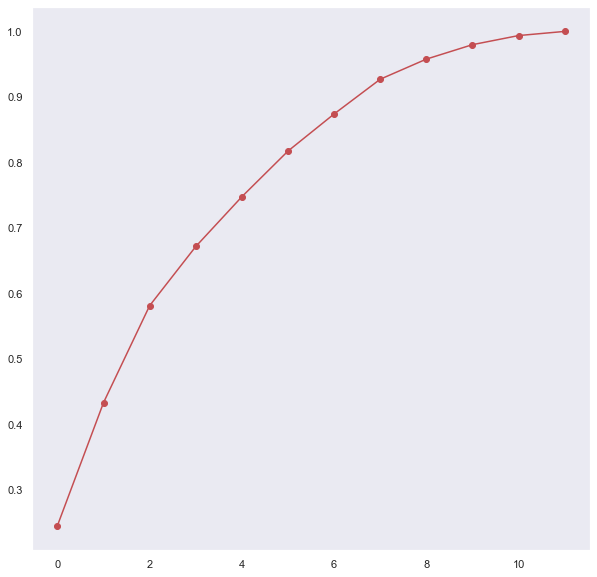

In [91]:
#plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [92]:
#AS per the graph, we can see that 8 principal components attribute for 90% of variation in the data. 
#So we shall pick the first 8 components for our prediction.
pca_new = PCA(n_components=8)
X_new = pca_new.fit_transform(X)

In [93]:
#Test Train split

X_train, X_test, Y_train, Y_test = train_test_split(X_new, reviews, test_size = 0.25)

In [94]:
#Random Forest Classifier

model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [95]:
#Accuracy score

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.9933110367892977


In [98]:
#save the model

import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)